In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dataset .csv")

In [3]:
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Task1: Predict Restaurant Ratings-----**

(a) Handle Missing Values

Numerical → fill with mean

Categorical → fill with mode

In [6]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [7]:
# Encode Categorical Variables
# Convert text → numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

In [8]:
print(df['City'])

0        73
1        73
2        75
3        75
4        75
       ... 
9546    140
9547    140
9548    140
9549    140
9550    140
Name: City, Length: 9551, dtype: int32


In [9]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model Selection (Regression)

Linear Regression (simple & interpretable),
Decision Tree Regressor (better for non-linear data)

In [10]:
X.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                      int32
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [11]:
if 'Currency' in df.columns:
    df = df.drop('Currency', axis=1)
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
df = df.drop(cat_cols, axis=1)
#REDEFINE X & y
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']


Index(['Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [12]:
#TRAIN–TEST SPLIT AGAIN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
# Model Selection (Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


1.5689614811041237
0.31068262206073394


In [15]:
# Feature Importance
model.coef_

array([-5.25494354e-08,  6.51667473e-03, -3.22809592e-03,  8.22435684e-04,
        5.04473537e-03,  1.10793799e-06,  5.02479743e-01,  4.87357414e-04])

**TASK 2: Restaurant Recommendation System**

In [16]:
df = pd.read_csv("Dataset .csv")

In [17]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [18]:
#Content-Based Filtering
def recommend(cuisine, price):
    return df[
        (df['Cuisines'].str.contains(cuisine,case=False, na=False)) &
        (df['Price range'] == price)
    ][['Restaurant Name', 'Aggregate rating']]

In [19]:
#Test Recommendation
recommend('North Indian', 2)

,Restaurant Name,Aggregate rating
625,Rangrezz Restaurant,3.5
626,Time2Eat - Mama Chicken,3.6
643,Thaaliwala,4.1
656,Kabir Restaurant,3.8
683,Sagar Ratna,3.5
...,...,...
9271,D Cabana,3.6
9272,Kaloreez,3.7
9394,Dishoom,4.7
9498,Elite Indian Restaurant,2.4


**TASK 3: Cuisine Classification----**

In [20]:
#Preprocessing
X = df.drop('Cuisines', axis=1)
y = df['Cuisines']
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [21]:
# Select ONLY useful columns
use_cols = [
    'Average Cost for two',
    'Price range',
    'Aggregate rating',
    'Votes',
    'Cuisines'
]

df = df[use_cols]


In [22]:
# Encode TARGET (Cuisines)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Cuisines'] = le.fit_transform(df['Cuisines'])

# Handle Missing Values
df = df.fillna(df.mean())

In [23]:
# Define X and y (CLEAN)
X = df.drop('Cuisines', axis=1)
y = df['Cuisines']


In [24]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
#Classification Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [26]:
# Evaluate Model
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.09314495028780743
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         0
          27       0.00      0.00      0.00        

C:\Users\rdube\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rdube\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rdube\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rdube\anaconda3\Lib\site-packages\sklearn\metrics\_cla

**TASK 4: Location-Based Analysis**

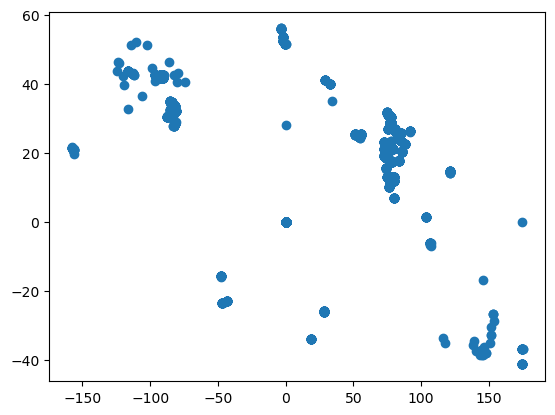

In [27]:
# Map Visualization
import matplotlib.pyplot as plt
df = pd.read_csv("Dataset .csv")
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

In [28]:
# City-wise Analysis
df.groupby('City')['Restaurant Name'].count()

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Name: Restaurant Name, Length: 141, dtype: int64

In [29]:
# City-wise Rating
df.groupby('City')['Aggregate rating'].mean()

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64